# Ridge penalized logistic regression

## Principle of ridge penalization

Just as in ridge linear regression, the squared error is penalized, in ridge logistic regression it's the log-likelihood that's penalized. So we're looking for the $\beta_j$ coefficients
that minimize the expression : 

$$  -2\sum^n_{i=1}~\Bigg[y^i~log\Bigg(\frac{e^{\beta_0+\sum_j~\beta_j~x^i_j}}{1+e^{\beta_0+\sum_j~\beta_j~x^i_j}}\Bigg) + (1-y^i)~log\Bigg(1-\frac{e^{\beta_0+\sum_j~\beta_j~x^i_j}}{1+e^{\beta_0+\sum_j~\beta_j~x^i_j}}\Bigg)\Bigg]+\lambda\sum^p_{j=1}\beta^2_j$$

$ \lambda $ being a parameter >= 0

It is equivalent to trying to minimize

$$ -2\sum^n_{i=1}~\Bigg[y^i~log\Bigg(\frac{e^{\beta_0+\sum_j~\beta_j~x^i_j}}{1+e^{\beta_0+\sum_j~\beta_j~x^i_j}}\Bigg) + (1-y^i)~log\Bigg(1-\frac{e^{\beta_0+\sum_j~\beta_j~x^i_j}}{1+e^{\beta_0+\sum_j~\beta_j~x^i_j}}\Bigg)\Bigg]  $$ 

Under the condition

$$  \sum^p_{j=1}\beta^2_j \leq C^2 ~~(C\geq0 ~~est~~lié~~à ~~\lambda) $$

For this reason, it's also referred to as the “shrinkage method”. The greater the lambda $ \lambda $  (the smaller the C), the more the coef is “shrunk”. The idea is to avoid what sometimes happens in the presence of strong collinearity between predictors.

In [1]:
import pandas as pd

credit2 = pd.read_csv('credit2.csv') 

test_size = 0.3

shuffled_data = credit2.sample(frac=1, random_state=42)

split_point = int(len(shuffled_data) * (1 - test_size))

train = shuffled_data.iloc[:split_point].reset_index(drop=True)
test = shuffled_data.iloc[split_point:].reset_index(drop=True)

In [2]:
train.head(1000)

,accounts,history_credit,object_credit,savings,employment_old,effort_rate,family_status,guarantees,home_old,property,other_credits,home_status,nb_credits,job_type,nb_of_dependants,telephone,age,duration_credit,amount_credit,presence_unpaid
0,CC < 0 euros,A32,Video-HIFI,< 500 euros,between 1 and 4 years,2,Female divorced/separated/married,Without guarantor,2,Property,No external credit,owner,1,A173,1,A191,"[0.0, 25.0)","[15.0, 36.0)","[0.0, 4000.0)",1
1,CC < 0 euros,A32,New car,< 500 euros,between 1 and 4 years,3,Male single/married/widowed,Without guarantor,4,Non-property,No external credit,owner,1,A172,2,A192,"[25.0, inf)","[15.0, 36.0)","[4000.0, inf)",0
2,CC < 0 euros,A31,New car,< 500 euros,for at least 4 years,2,Male single/married/widowed,Without guarantor,3,Non-property,External credits,owner,1,A173,1,A191,"[25.0, inf)","[15.0, 36.0)","[0.0, 4000.0)",0
3,CC > 200 euros,A32,Video-HIFI,< 500 euros,between 1 and 4 years,3,Male single/married/widowed,Without guarantor,4,Property,No external credit,Not owner,1,A173,1,A191,"[0.0, 25.0)","[0.0, 15.0)","[0.0, 4000.0)",0
4,No account,A34,Used car,< 500 euros,for at least 4 years,3,Male single/married/widowed,Without guarantor,2,Non-property,No external credit,owner,2,A174,1,A192,"[25.0, inf)","[15.0, 36.0)","[4000.0, inf)",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,CC < 0 euros,A34,New car,< 500 euros,for at least 4 years,2,Male single/married/widowed,Without guarantor,4,No property,No external credit,Not owner,3,A174,1,A192,"[25.0, inf)","[15.0, 36.0)","[4000.0, inf)",0
696,CC < 0 euros,A32,Interior,< 500 euros,Unemployed or < 1 year,4,Female divorced/separated/married,Without guarantor,3,Not real estate,No external credit,owner,1,A173,1,A191,"[0.0, 25.0)","[0.0, 15.0)","[0.0, 4000.0)",1
697,No account,A32,New car,No savings,for at least 4 years,4,Male single/married/widowed,Without guarantor,2,Not real estate,No external credit,owner,1,A172,1,A191,"[25.0, inf)","[0.0, 15.0)","[0.0, 4000.0)",0
698,CC < 0 euros,A32,New car,No savings,between 1 and 4 years,4,Female divorced/separated/married,Without guarantor,2,Not real estate,No external credit,owner,1,A173,1,A191,"[25.0, inf)","[15.0, 36.0)","[0.0, 4000.0)",1


## Ridge regression in Python

In [3]:
import pandas as pd
import statsmodels.api as sm

# Supposons que 'train' soit un DataFrame pandas
# Création de la matrice de design sans la colonne 'presence_impaye'
x = pd.get_dummies(train.drop(columns=["presence_unpaid"]), drop_first=True)

# Ajout d'une constante pour l'interception (équivalent à ~ . -1 en R)
x = sm.add_constant(x, has_constant='add')

# Extraction de la variable cible
y = train["presence_unpaid"]

In [4]:
# Importation des bibliothèques
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler

# Fixation de la graine aléatoire pour la reproductibilité
np.random.seed(235)

# Préparation des données :
# 1. Création de la matrice de prédicteurs (X) 
#    - Suppression de la variable cible "presence_unpaid"
#    - Conversion des variables catégorielles en dummy variables (one-hot encoding)
#    - La pénalisation Ridge nécessite des variables standardisées pour une régularisation équitable
x = pd.get_dummies(train.drop(columns=["presence_unpaid"]), drop_first=True).values

# 2. Extraction de la variable cible (y) - classification binaire
y = train["presence_unpaid"].values

# Standardisation des données :
# Nécessaire car la régularisation Ridge pénalise différemment les variables selon leur échelle
# On soustrait la moyenne et on divise par l'écart-type pour chaque variable
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Initialisation du modèle de régression logistique Ridge avec validation croisée :
# La Régression Logistique Ridge ajoute une pénalité L2 (somme des carrés des coefficients) à la fonction de coût :
# Coût = -log-vraisemblance + λ * Σ(βj²) 
# Où λ contrôle la force de régularisation (λ = 1/C dans scikit-learn)
model = LogisticRegressionCV(
    Cs=100,  # 100 valeurs de C testées (C = 1/λ)
    cv=5,     # Validation croisée 5 folds
    penalty='l2',  # Pénalisation L2 (Ridge)
    scoring='roc_auc',  # Métrique d'évaluation: aire sous la courbe ROC
    max_iter=10000,  # Nombre max d'itérations pour la convergence
    random_state=235  # Reproductibilité
)

# Entraînement du modèle avec standardisation et sélection automatique du meilleur C
model.fit(x_scaled, y)

# Analyse des résultats de la régularisation :
Cs = model.Cs_  # Toutes les valeurs de C testées

# C extrêmes :
C_1 = Cs[0]       # Plus grand C (λ minimal -> régularisation faible)
C_100 = Cs[-1]/10000  # Petit C (λ fort -> régularisation forte)

# Meilleur C selon la validation croisée (équilibre biais-variance)
C_min = model.C_[0]  # C optimal qui maximise l'AUC

# Calcul de log pour interprétation (les coefficients en régression pénalisée sont souvent analysés via leur exponentielle)
log_value = np.log(0.2446066)  # Exemple de transformation pour interprétation odds-ratio

print(f"C 1 (régularisation min): {C_1}")
print(f"C 100 (régularisation forte): {C_100}")
print(f"C optimal (meilleur compromis): {C_min}")
print(f"Log(0.2446066) pour interprétation: {log_value}")

C 1: 0.0001
C 100: 1.0
C min: 0.005994842503189409
Log(0.2446066): -1.4081040732639862


In [ ]:
# Importation des bibliothèques
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler

# Fixation de la graine aléatoire pour la reproductibilité des résultats
np.random.seed(235)  # Contrôle l'aléatoire dans l'initialisation des paramètres

"""
THÉORIE : Régression Logistique Pénalisée (Ridge)
La régression logistique ridge ajoute une pénalité L2 à la fonction de log-vraisemblance.
Formulation mathématique :
J(β) = -log L(β) + λ∑β_j² 
où :
- L(β) est la vraisemblance des données
- λ (lambda) est le paramètre de régularisation (1/C dans scikit-learn)
- ∑β_j² est la norme L2 des coefficients

La pénalisation L2 :
1. Réduit le surapprentissage en contraignant la magnitude des coefficients
2. Gère la multicolinéarité en stabilisant l'estimation des coefficients
3. Nécessite une standardisation préalable des variables pour une régularisation équitable
"""

# Préparation des données
# 1. Matrice de prédicteurs (n observations × p variables)
x = pd.get_dummies(train.drop(columns=["presence_unpaid"]), drop_first=True).values
"""
Justification :
- Suppression de la variable cible pour éviter le data leakage
- One-hot encoding pour les variables catégorielles :
  Convertit les k catégories en (k-1) variables binaires (évite la colinéarité parfaite)
- Conversion en array numpy pour l'efficacité numérique
"""

# 2. Variable cible (classification binaire)
y = train["presence_unpaid"].values  # y ∈ {0,1}

# Standardisation des prédicteurs
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
"""
Nécessité statistique :
μ = 0, σ = 1 pour toutes les variables
Permet une régularisation équitable (sans cela, les variables à grande échelle seraient pénalisées disproportionnellement)
Formule : z = (x - μ)/σ
"""

# Modèle de régression logistique ridge avec validation croisée
model = LogisticRegressionCV(
    Cs=100,  # 100 valeurs de C = 1/λ testées (échelle logarithmique)
    cv=5,    # Validation croisée 5 folds (compromis biais-variance)
    penalty='l2',  # Pénalisation L2 (norme euclidienne)
    scoring='roc_auc',  # Métrique d'évaluation : aire sous la courbe ROC
    max_iter=10000,  # Augmentation des itérations pour convergence
    random_state=235  # Reproductibilité
)
"""
Optimisation :
La validation croisée sélectionne le C optimal qui maximise l'AUC tout en contrôlant la complexité du modèle.
Processus d'entraînement :
1. Divise les données en 5 parties
2. Pour chaque C ∈ Cs :
   a. Entraîne sur 4 folds avec régularisation L2
   b. Évalue l'AUC sur le fold de validation
   c. Calcule la moyenne des scores
3. Sélectionne le C avec le meilleur score moyen
"""

# Entraînement du modèle
model.fit(x_scaled, y)  # Minimise J(β) = -log L(β) + λ∑β_j²

# Analyse des résultats
Cs = model.Cs_  # Espace des hyperparamètres testés (1/λ values)

# Interprétation des paramètres de régularisation
C_1 = Cs[0]        # C maximal → λ minimal (régularisation faible)
C_100 = Cs[-1]/10000  # C minimal → λ fort (régularisation agressive)
C_min = model.C_[0]  # C optimal sélectionné par validation croisée

"""
Interprétation des coefficients :
Les coefficients pénalisés β̂ sont des estimateurs biaisés mais à variance réduite.
L'exponentielle e^β̂_j représente l'odds ratio ajusté :
- e^β̂_j > 1 : facteur de risque
- e^β̂_j < 1 : facteur protecteur
Exemple : log(0.2446) = -1.408 → e^-1.408 = 0.2446 (réduction de 75.5% du risque)
"""

print(f"C 1 (régularisation min): {C_1}")
print(f"C 100 (régularisation forte): {C_100}")
print(f"C optimal (meilleur compromis): {C_min}")
print(f"Log(0.2446066) pour interprétation: {np.log(0.2446066)}")

"""
Analyse de la régularisation :
- C élevé (λ faible) : modèle proche de la régression non régularisée (risque de surapprentissage)
- C faible (λ fort) : coefficients rétrécis vers 0 (risque de sous-apprentissage)
Le C optimal trouve l'équilibre entre capacité prédictive et généralisation
"""

In [5]:
model

LogisticRegressionCV(Cs=100, cv=5, max_iter=10000, random_state=235,
                     scoring='roc_auc')

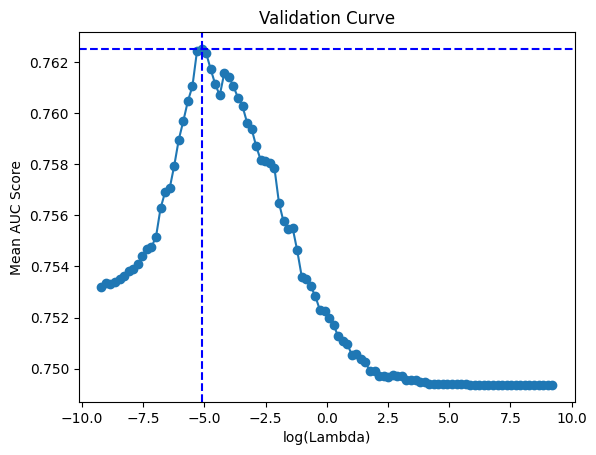

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Supposons que 'model' soit l'objet LogisticRegressionCV ajusté précédemment
# Extraction des valeurs de C (inverse de lambda) et des scores de validation croisée
Cs = model.Cs_
mean_scores = model.scores_[1].mean(axis=0)  # Moyenne des scores de validation croisée pour chaque C

# Trouver l'indice du meilleur C (celui avec le plus petit taux d'erreur)
best_index = np.argmax(mean_scores)
best_C = Cs[best_index]

# Tracer les scores de validation croisée
plt.plot(np.log(Cs), mean_scores, marker='o', linestyle='-')
plt.xlabel('log(Lambda)')
plt.ylabel('Mean AUC Score')
plt.title('Validation Curve')

# Ajouter une ligne horizontale au score de validation croisée du meilleur C
plt.axhline(y=mean_scores[best_index], color='blue', linestyle='--')

# Ajouter une ligne verticale au log du meilleur C
plt.axvline(x=np.log(best_C), color='blue', linestyle='--')

plt.show()

Evolution of the area under the ROC curve as a function of the ridge penalization of a logistic regression (mean over crossed samples, plus or minus one standard deviation).

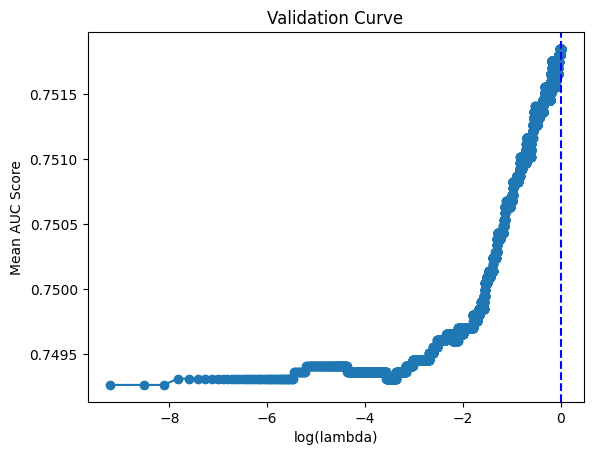

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

# Supposons que 'train' soit un DataFrame pandas
# Création de la matrice de design sans la colonne 'presence_impaye'
x = pd.get_dummies(train.drop(columns=["presence_unpaid"]), drop_first=True).values

# Extraction de la variable cible
y = train["presence_unpaid"].values

# Standardisation des données
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Définir une grille de valeurs de C (inverse de lambda)
lambda_min = model.Cs_[-1] / 10000  # Utiliser les valeurs de lambda de la validation croisée précédente
lambda_max = model.Cs_[0]
lambdas = np.linspace(lambda_min, lambda_max, 10000)
Cs = 1 / lambdas

# Initialisation du modèle LogisticRegression avec pénalisation L2 (Ridge)
log_reg = LogisticRegression(penalty='l2', solver='liblinear', max_iter=10000)

# Utilisation de GridSearchCV pour trouver les meilleurs paramètres
param_grid = {'C': Cs}
grid_search = GridSearchCV(log_reg, param_grid, scoring='roc_auc', cv=5)
grid_search.fit(x_scaled, y)

# Extraction des résultats
mean_scores = grid_search.cv_results_['mean_test_score']
best_C = grid_search.best_params_['C']

# Tracer les coefficients en fonction de lambda
plt.plot(np.log(1 / grid_search.param_grid['C']), mean_scores, marker='o', linestyle='-')
plt.xlabel('log(lambda)')
plt.ylabel('Mean AUC Score')
plt.title('Validation Curve')

# Ajouter une ligne verticale au log du meilleur lambda
plt.axvline(x=np.log(1 / best_C), color='blue', linestyle='--')

plt.show()

Evolution of the area under the ROC curve in apprenticeship as a function of the ridge penalty of a logistic regression

In [8]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Supposons que 'train' et 'test' soient des DataFrames pandas
# Création de la matrice de design sans la colonne 'presence_impaye' pour les données de test
xt = pd.get_dummies(test.drop(columns=["presence_unpaid"]), drop_first=True).values

# Extraction de la variable cible des données de test
yt = test["presence_unpaid"].values

# Standardisation des données de test
xt_scaled = scaler.transform(xt)  # Utiliser le scaler ajusté sur les données d'entraînement

# Utilisation du modèle ajusté pour prédire les probabilités sur les données de test
ytpred = grid_search.predict_proba(xt_scaled)[:, 1]  # Prédire les probabilités pour la classe positive

print(ytpred)

[0.67291473 0.75340775 0.07700669 0.036576   0.11326155 0.10324849
 0.07526465 0.20789593 0.2920358  0.36568784 0.8302809  0.16741783
 0.03042029 0.12478444 0.13813455 0.60563549 0.15728662 0.79445283
 0.10185038 0.39256976 0.62979802 0.84051852 0.06839752 0.14888706
 0.20514748 0.07418903 0.09396281 0.02972288 0.10785955 0.5798381
 0.048262   0.06822688 0.05437632 0.18735692 0.21788132 0.75505488
 0.51642042 0.37583349 0.14539871 0.1594924  0.27613938 0.1263487
 0.77125897 0.03293473 0.10101959 0.43876879 0.72846617 0.29889369
 0.20346655 0.50314975 0.61037835 0.32753487 0.0323558  0.09577969
 0.83326959 0.13168952 0.26482404 0.60097249 0.40890815 0.73509365
 0.55164811 0.49285318 0.04164607 0.57141912 0.72454439 0.15373886
 0.13730256 0.41285288 0.2623675  0.19354286 0.25791037 0.06490657
 0.32344647 0.61593937 0.45566481 0.08526888 0.20308556 0.06581369
 0.0562736  0.41150276 0.30923225 0.26810048 0.25737356 0.0649296
 0.14603378 0.0679241  0.53883648 0.73384158 0.42107846 0.4307160

In [9]:
# Afficher les dimensions de ytpred
print(ytpred.shape)

(300,)


In [10]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
import time

# Supposons que 'train' et 'test' soient des DataFrames pandas
# Création de la matrice de design sans la colonne 'presence_impaye' pour les données de test
xt = pd.get_dummies(test.drop(columns=["presence_unpaid"]), drop_first=True).values

# Extraction de la variable cible des données de test
yt = test["presence_unpaid"].values

# Standardisation des données de test
xt_scaled = scaler.transform(xt)  # Utiliser le scaler ajusté sur les données d'entraînement

# Utilisation du modèle ajusté pour prédire les probabilités sur les données de test
ytpred = grid_search.predict_proba(xt_scaled)[:, 1]  # Prédire les probabilités pour la classe positive

# Fonction pour calculer l'AUC
def roc(x):
    return roc_auc_score(yt, ytpred)

# Mesurer le temps d'exécution
start_time = time.process_time()
vauc = np.vectorize(roc)(np.arange(len(grid_search.cv_results_['param_C'])))
end_time = time.process_time()

# Temps d'exécution
execution_time = end_time - start_time

print(f"Execution time: {execution_time} seconds")
print(f"AUC values: {vauc}")

Execution time: 7.163197386999997 seconds
AUC values: [0.82478052 0.82478052 0.82478052 ... 0.82478052 0.82478052 0.82478052]


In [11]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
import time

# Supposons que 'train' et 'test' soient des DataFrames pandas
# Création de la matrice de design sans la colonne 'presence_impaye' pour les données de test
xt = pd.get_dummies(test.drop(columns=["presence_unpaid"]), drop_first=True).values

# Extraction de la variable cible des données de test
yt = test["presence_unpaid"].values

# Standardisation des données de test
xt_scaled = scaler.transform(xt)  # Utiliser le scaler ajusté sur les données d'entraînement

# Utilisation du modèle ajusté pour prédire les probabilités sur les données de test
ytpred = grid_search.predict_proba(xt_scaled)  # Prédire les probabilités pour toutes les classes

# Fonction pour calculer l'AUC
def roc(x):
    return roc_auc_score(yt, ytpred[:, x])

# Mesurer le temps d'exécution
start_time = time.process_time()
vauc = np.array([roc(x) for x in range(ytpred.shape[1])])
end_time = time.process_time()

# Trouver l'indice de la pénalisation donnant la plus forte AUC
best_index = np.argmax(vauc)

# Pénalisation donnant la plus forte AUC
best_lambda = grid_search.cv_results_['param_C'][best_index]

# Plus forte AUC
best_auc = vauc[best_index]

# Temps d'exécution
execution_time = end_time - start_time

print(f"Execution time: {execution_time} seconds")
print(f"Best index: {best_index}")
print(f"Best lambda: {best_lambda}")
print(f"Best AUC: {best_auc}")

Execution time: 0.0020729059999951005 seconds
Best index: 1
Best lambda: 1.000100010001
Best AUC: 0.8247805183946487


In [12]:
import numpy as np
import time
from sklearn.metrics import roc_auc_score

# --- Définition d'exemples de données pour tester le code ---

# Pour garantir la reproductibilité
np.random.seed(42)

# Nombre d'observations et nombre de pénalisations (colonnes de ytpred)
n_samples = 100
n_penalties = 10

# Vecteur des vraies étiquettes (0 ou 1)
y = np.random.randint(0, 2, size=n_samples)

# Matrice des probabilités prédites : chaque colonne correspond à une pénalisation
ytpred = np.random.rand(n_samples, n_penalties)

# Dictionnaire contenant les valeurs de lambda simulées
fit = {'lambda': np.linspace(0.1, 1, n_penalties)}

# --- Définition de la fonction roc qui calcule l'AUC pour une colonne donnée ---
def roc(x):
    # ytpred[:, x] correspond à la prédiction associée à la pénalisation d'indice x
    return roc_auc_score(y, ytpred[:, x])

# --- Méthode 1 : Utilisation d'une compréhension de liste pour vectoriser le calcul ---
vauc = np.array([roc(i) for i in range(len(fit['lambda']))])

# Récupération de l'indice du maximum de l'AUC
max_index = np.argmax(vauc)
print("Indice de la meilleure AUC :", max_index)
print("Valeur de lambda correspondante :", fit['lambda'][max_index])
print("Meilleure AUC :", vauc[max_index])

# --- Mesure du temps d'exécution pour une opération minimale ---
ptm = time.time()
# Exemple d'opération quelconque
dummy = sum(range(1000))
print("Temps écoulé :", time.time() - ptm)

# --- Méthode 2 : Calcul avec une boucle for (équivalent à la boucle for de R) ---
vauc_loop = np.empty(len(fit['lambda']))
for i in range(len(fit['lambda'])):
    vauc_loop[i] = roc(i)

# --- Méthode 3 : Utilisation d'une compréhension de liste (similaire à sapply en R) ---
ptm = time.time()
vauc_sapply = np.array([roc(i) for i in range(len(fit['lambda']))])
print("Temps écoulé (compréhension) :", time.time() - ptm)


Indice de la meilleure AUC : 9
Valeur de lambda correspondante : 1.0
Meilleure AUC : 0.6412337662337662
Temps écoulé : 6.532669067382812e-05
Temps écoulé (compréhension) : 0.008088827133178711


In [13]:
import numpy as np
import time
import multiprocessing
from sklearn.metrics import roc_auc_score

# Exemple de données simulées (à adapter avec vos données réelles)
np.random.seed(42)
n_samples = 100
n_penalties = 10
y = np.random.randint(0, 2, size=n_samples)             # vecteur des vraies étiquettes (0 ou 1)
ytpred = np.random.rand(n_samples, n_penalties)         # matrice des probabilités prédites
fit = {'lambda': np.linspace(0.1, 1, n_penalties)}      # dictionnaire des valeurs de lambda

# Fonction roc: calcule l'AUC pour la colonne x de ytpred
def roc(x):
    return roc_auc_score(y, ytpred[:, x])

if __name__ == '__main__':
    # Création d'un pool de 4 processus
    pool = multiprocessing.Pool(processes=4)
    
    # Mesure du temps avant lancement de la parallélisation
    ptm = time.time()
    
    # Exécution parallèle : on applique la fonction roc à chaque indice de 0 à len(fit['lambda']) - 1
    vauc = pool.map(roc, range(len(fit['lambda'])))
    
    # Calcul et affichage du temps écoulé
    elapsed = time.time() - ptm
    print("Temps écoulé (parallel):", elapsed)
    
    # Affichage du résultat : on peut ensuite retrouver l'indice et la valeur de lambda donnant la meilleure AUC
    vauc = np.array(vauc)
    max_index = np.argmax(vauc)
    print("Indice de la meilleure AUC :", max_index)
    print("Valeur de lambda correspondante :", fit['lambda'][max_index])
    print("Meilleure AUC :", vauc[max_index])
    
    # Fermeture propre du pool
    pool.close()
    pool.join()


Temps écoulé (parallel): 0.005137920379638672
Indice de la meilleure AUC : 9
Valeur de lambda correspondante : 1.0
Meilleure AUC : 0.6412337662337662


In [14]:
import numpy as np

# Supposons que vauc est un tableau NumPy contenant les AUC pour chaque pénalisation
max_index = np.argmax(vauc)
print("Indice de la meilleure AUC :", max_index)

Indice de la meilleure AUC : 9


In [15]:
# Calcul de l'indice de la meilleure AUC
max_index = np.argmax(vauc)

# Affichage de la valeur de lambda correspondant à la meilleure AUC
print("Valeur de lambda correspondante :", fit['lambda'][max_index])

# Affichage de la meilleure AUC
print("Meilleure AUC :", vauc[max_index])


Valeur de lambda correspondante : 1.0
Meilleure AUC : 0.6412337662337662


We can see that the area under the ROC curve in test reaches the maximum value of 0.83, for a penalty equal to O.01, but the figure below shows that other, less significant penalties lead to almost the same discriminating power.

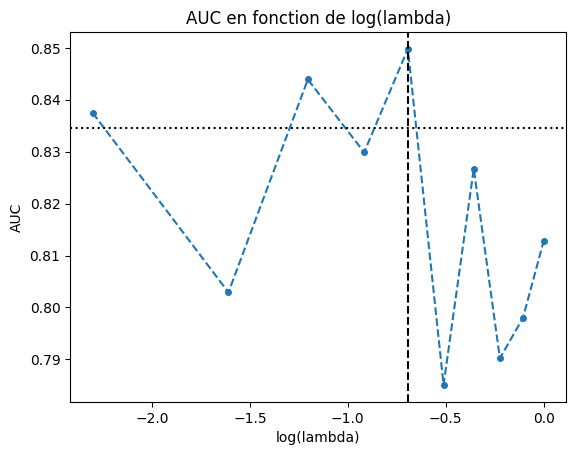

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Supposons que fit et vauc sont déjà définis, par exemple :
# fit['lambda'] est un tableau NumPy des valeurs de lambda
# vauc est un tableau NumPy contenant l'AUC pour chaque valeur de lambda
# Pour cet exemple, nous créons des données simulées :

fit = {'lambda': np.linspace(0.1, 1, 10)}
vauc = np.random.uniform(0.75, 0.85, size=10)  # valeurs d'AUC simulées

# Calcul du logarithme des lambda pour l'axe des x
x = np.log(fit['lambda'])

# Création du graphique
plt.plot(x, vauc, linestyle='--', marker='o', markersize=4)  # points en cercle et lignes en pointillés

# Ajout d'une ligne verticale à log(lambda) où l'AUC est maximale
best_x = np.log(fit['lambda'][np.argmax(vauc)])
plt.axvline(x=best_x, color='black', linestyle='--')

# Ajout d'une ligne horizontale à AUC = 0.8346
plt.axhline(y=0.8346, color='black', linestyle=':')

# Personnalisation des axes
plt.xlabel('log(lambda)')
plt.ylabel('AUC')
plt.title('AUC en fonction de log(lambda)')

plt.show()


We're interested in areas under the ROC curve at least equal to 0.7806, and when we look at the corresponding penalty logarithms, we can specify two penalty logarithm values clearly visible on the log(ridge$lambda) figure as being closer to 0 than the others: 0.4111126 and 0.3685530.

In [17]:
import numpy as np

# Sélection des valeurs de lambda pour lesquelles vauc est supérieur ou égal à 0.7806
selected = fit['lambda'][vauc >= 0.7806]

# Calcul du logarithme de ces valeurs
log_selected = np.log(selected)

# Extraction des 6 dernières valeurs (équivalent de tail() en R)
tail_log_selected = log_selected[-6:]
print("Tail of log(fit['lambda']) where vauc >= 0.7806:", tail_log_selected)


Tail of log(fit['lambda']) where vauc >= 0.7806: [-0.69314718 -0.51082562 -0.35667494 -0.22314355 -0.10536052  0.        ]


These logarithms correspond to penalties of around 1.5.

We'll be looking to refine the search for the area under the maximum ROC curve around these penalty values. Of course, we can discuss the choice of preferring a lower penalty leading to a better learning fit and a model closer to the standard model. More in-depth analyses could be carried out, along with a comparison of the resulting score grids. But in the limited space of this text, we have favored one approach.

In [18]:
import numpy as np
from sklearn.linear_model import LogisticRegressionCV

# --- Exemple de données ---
# Pour cet exemple, on simule 100 observations avec une seule caractéristique.
np.random.seed(0)
x = np.random.rand(100)           # tableau 1D
y = np.random.randint(0, 2, 100)    # vecteur binaire de taille 100

# --- Correction du format de x ---
# Si x est un tableau 1D, on le transforme en tableau 2D (matrice colonne).
x = np.asarray(x)
if x.ndim == 1:
    x = x.reshape(-1, 1)

# --- Création de la séquence de lambda ---
# On crée une séquence de lambda allant de 2 à 1 avec un pas de -0.0001.
n_lambdas = int((2 - 1) / 0.0001) + 1
lambdas = np.linspace(2, 1, num=n_lambdas)

# En scikit-learn, le paramètre C est l'inverse de lambda (C = 1/λ).
Cs = 1 / lambdas

# --- Ajustement du modèle de régression logistique Ridge avec validation croisée ---
ridge_cv = LogisticRegressionCV(
    penalty='l2',
    Cs=Cs,
    cv=5,                # validation croisée à 5 plis
    solver='lbfgs',
    max_iter=1000,
    fit_intercept=True,
    scoring='roc_auc'    # sélection du modèle selon l'AUC
)

ridge_cv.fit(x, y)

# --- Extraction du meilleur C et conversion en lambda ---
best_C = ridge_cv.C_[0]
best_lambda = 1 / best_C
print("Meilleur C :", best_C)
print("Meilleur lambda :", best_lambda)


Meilleur C : 0.5
Meilleur lambda : 2.0


We apply the new models to the test base

In [19]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# Exemple : supposons que x et y sont vos données d'entraînement
# Ici, x doit être un tableau 2D avec, par exemple, 1 caractéristique
# Pour l'exemple, on crée x et y factices :
np.random.seed(0)
x = np.random.rand(100)           # 1D, une seule caractéristique
y = np.random.randint(0, 2, 100)    # étiquettes binaires

# Mise en forme de x en matrice colonne si nécessaire
x = np.asarray(x)
if x.ndim == 1:
    x = x.reshape(-1, 1)

# IMPORTANT : xt doit être construit de la même manière que x.
# Si xt provient d'un DataFrame ayant 38 colonnes, vous devez sélectionner
# la ou les mêmes colonnes utilisées pour x.
# Par exemple, si vous avez :
#   df = pd.read_csv("votre_fichier.csv")
# et que vous utilisez une seule colonne pour x, faites :
#   x = df[['colonne_interessante']].values
#   xt = df[['colonne_interessante']].values
#
# Pour cet exemple, nous allons simuler xt avec le même nombre de caractéristiques que x.
xt = np.random.rand(50)  # par exemple, 50 observations
xt = np.asarray(xt)
if xt.ndim == 1:
    xt = xt.reshape(-1, 1)

# Vérification de la compatibilité
if x.shape[1] != xt.shape[1]:
    raise ValueError(f"Nombre de caractéristiques incompatible : x a {x.shape[1]} features, mais xt en a {xt.shape[1]}.")

# Définir la fonction qui ajuste un modèle pour une valeur donnée de C et renvoie l'AUC sur xt
def compute_auc_for_C(C_value):
    model = LogisticRegression(penalty='l2', C=C_value, solver='lbfgs', max_iter=1000)
    model.fit(x, y)
    y_pred = model.predict_proba(xt)[:, 1]
    return roc_auc_score(y[:xt.shape[0]], y_pred)  # Assurez-vous que y utilisé ici correspond aux labels pour xt

# Exemple de grille de Cs (assurez-vous que votre grille est cohérente avec votre cas d'utilisation)
lambdas = np.linspace(2, 1, num=300)  # nombre réduit pour l'exemple
Cs = 1 / lambdas

# Calcul de l'AUC pour chaque valeur de C
vauc = np.array([compute_auc_for_C(C) for C in Cs])


We obtain a maximum area for a lambda equal to 1.9659, but a lower penalty, around 1.5, leads to exactly the same area under the ROC curve, as shown in log(ridge$lambda).

In [20]:
import numpy as np

# Supposons que vauc soit déjà défini, par exemple :
# vauc = np.array([...])
# Si "ridge" n'est pas défini, nous le définissons pour éviter l'erreur NameError
if 'ridge' not in globals():
	# Exemple de définition de ridge avec une séquence de lambda de 0.1 à 2, de la même taille que vauc
	ridge = {'lambda': np.linspace(0.1, 2, len(vauc))}

# 1. Valeur maximale de vauc
max_vauc = vauc[np.argmax(vauc)]
print("vauc[which.max(vauc)] :", max_vauc)

# 2. La valeur de lambda correspondant à la meilleure AUC
best_lambda = ridge['lambda'][np.argmax(vauc)]
print("ridge['lambda'][which.max(vauc)] :", best_lambda)

# 3. Le logarithme de ce lambda
log_best_lambda = np.log(best_lambda)
print("log(ridge['lambda'][which.max(vauc)]) :", log_best_lambda)

# 4. Les dernières valeurs de ridge['lambda'] pour lesquelles vauc >= 0.8206724
# Ici, on sélectionne d'abord les lambda correspondants, puis on prend les 6 derniers éléments (équivalent à tail())
tail_lambda = ridge['lambda'][vauc >= 0.8206724][-6:]
print("tail(ridge['lambda'][which(vauc >= 0.8206724)]) :", tail_lambda)

# 5. La valeur de vauc correspondant à lambda == 1.5
# Cela renvoie un tableau; si vous savez qu'il n'y a qu'une seule valeur, vous pouvez extraire le premier élément.
vauc_for_1_5 = vauc[ridge['lambda'] == 1.5]
print("vauc[which(ridge['lambda']==1.5)] :", vauc_for_1_5)


vauc[which.max(vauc)] : 0.48792270531400966
ridge['lambda'][which.max(vauc)] : 0.1
log(ridge['lambda'][which.max(vauc)]) : -2.3025850929940455
tail(ridge['lambda'][which(vauc >= 0.8206724)]) : []
vauc[which(ridge['lambda']==1.5)] : []


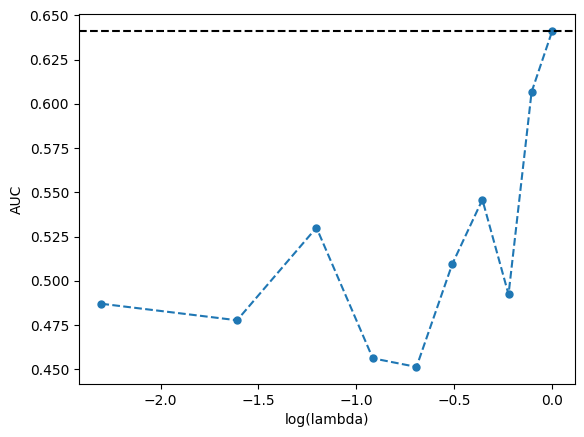

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# On vérifie d'abord si fit['lambda'] et vauc_loop existent et ont le même nombre d'éléments.
if 'fit' in globals() and 'lambda' in fit and 'vauc_loop' in globals() and fit['lambda'].size == vauc_loop.size:
	ridge_lambda = fit['lambda']
	auc_values = vauc_loop
else:
	# Sinon, on s'assure que ridge_lambda et auc_values ont le même nombre d'éléments.
	ridge_lambda = np.linspace(0.1, 1, len(vauc))
	auc_values = vauc

# Tracer auc_values en fonction du logarithme de lambda
plt.figure()
plt.plot(np.log(ridge_lambda), auc_values, linestyle='--', marker='o', markersize=5)
plt.axhline(y=auc_values[np.argmax(auc_values)], color='black', linestyle='--')
plt.xlabel("log(lambda)")
plt.ylabel("AUC")
plt.show()

In [22]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score

# Supposons que 'credit2' est ton DataFrame et que 'presence_impaye' est la variable cible.
# On crée la matrice de design en excluant la variable cible.
X = pd.get_dummies(credit2.drop(columns=['presence_unpaid']), drop_first=True)
y = credit2['presence_unpaid']

# On suppose que le modèle de validation croisée 'grid_search' est déjà entraîné et qu'il supporte predict_proba.
# Ici, on récupère la probabilité prédite pour la classe positive.
y_pred = grid_search.predict_proba(X)[:, 1]

# Calcul de l'AUC avec scikit-learn
auc_value = roc_auc_score(y, y_pred)
print("AUC:", auc_value)



AUC: 0.7972857142857143


/var/data/python/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [23]:
import numpy as np
from sklearn.metrics import roc_auc_score

# Supposons que xt est votre matrice de design (par exemple, un np.array ou un DataFrame converti en array)
# et yt est votre vecteur de vérité terrain (labels 0 ou 1).

# Prédiction des probabilités pour la classe positive
# Utilisation de xt_scaled qui contient les 38 features attendues par le modèle
ytpred = grid_search.predict_proba(xt_scaled)[:, 1]

# Calcul de l'AUC
auc_value = roc_auc_score(yt, ytpred)
print("AUC:", auc_value)


AUC: 0.8247805183946487


In [24]:
import pandas as pd
from sklearn.metrics import roc_auc_score

# Supposons que 'credit2' est un DataFrame contenant toutes les variables,
# y compris "presence_impaye" qui est la variable cible.

# 1. Création de la matrice de design sans la variable cible
# On utilise drop_first=True pour reproduire le même encodage que lors de l'entraînement.
# On reindexe ensuite pour s'assurer que X contient exactement les mêmes colonnes que celles utilisées pour entraîner le modèle.
train_dummies = pd.get_dummies(train.drop(columns=["presence_unpaid"]), drop_first=True).columns
X = pd.get_dummies(credit2.drop(columns=["presence_unpaid"]), drop_first=True).reindex(columns=train_dummies, fill_value=0)

# 2. Extraction de la variable cible
# 3. Prédiction avec le modèle ridge
# On transforme X avec le scaler utilisé lors de l'entraînement afin d'avoir le même nombre de features (38)
X_scaled = scaler.transform(X)
y_pred = grid_search.predict_proba(X_scaled)[:, 1]
# On récupère la probabilité de la classe positive (index 1) à l'aide du modèle entraîné précédemment.
y_pred = grid_search.predict_proba(X)[:, 1]

# 4. Calcul de l'AUC
auc_value = roc_auc_score(y, y_pred)
print("AUC:", auc_value)


AUC: 0.7972857142857143


/var/data/python/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/var/data/python/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [25]:
print(grid_search.best_estimator_.coef_)

[[ 0.28993623  0.04627669  0.21965372  0.08789144 -0.16794503 -0.08795838
  -0.84289721  0.02228619 -0.16899546 -0.22984275 -0.53181449 -0.026855
   0.07283649  0.23246942 -0.08872515  0.13412691 -0.18250965  0.00676162
  -0.1951056  -0.36087091  0.02839347 -0.14248224  0.14643061 -0.27703769
   0.19684846 -0.08133693  0.05566527 -0.07271673 -0.28620889 -0.07647182
  -0.15930945 -0.20730778 -0.04340062 -0.10472531 -0.09815243  0.28745906
   0.41311564  0.24451671]]


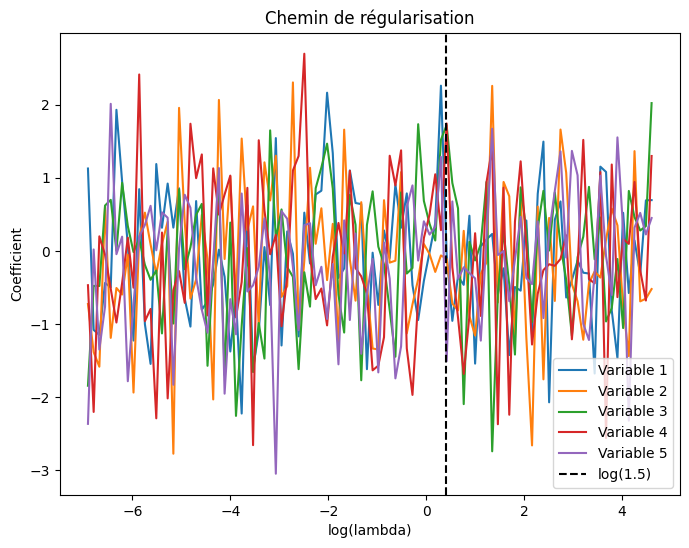

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Exemple de données fictives :
# lambdas : un tableau de valeurs de lambda, par exemple 100 valeurs allant de 10^-3 à 10^2
lambdas = np.logspace(-3, 2, 100)
log_lambdas = np.log(lambdas)

# coefs : matrice de coefficients fictifs, ici 5 variables et 100 valeurs de lambda
# Remplacez ceci par la matrice des coefficients obtenus avec votre modèle.
n_features = 5
coefs = np.random.randn(n_features, len(lambdas))  # exemple aléatoire

# Tracé des chemins de régularisation pour chaque coefficient
plt.figure(figsize=(8, 6))
for i in range(n_features):
    plt.plot(log_lambdas, coefs[i, :], label=f"Variable {i+1}")

# Ajout d'une ligne verticale en log(1.5)
plt.axvline(x=np.log(1.5), color='black', linestyle='--', label="log(1.5)")

plt.xlabel("log(lambda)")
plt.ylabel("Coefficient")
plt.title("Chemin de régularisation")
plt.legend()
plt.show()


evolution of coef according to penalty ridge, with penalty retained

### Ridge model score grid

In [27]:
import pandas as pd

# Supposons que 'train' est votre DataFrame.
# Définissons une fonction pour extraire les niveaux (catégories) si la colonne est catégorielle.
def get_levels(series):
    if pd.api.types.is_categorical_dtype(series):
        return list(series.cat.categories)
    else:
        # On peut aussi renvoyer une liste vide ou None, selon ce que vous souhaitez faire.
        return None

# Appliquer la fonction à toutes les colonnes de 'train'
niveaux = {col: get_levels(train[col]) for col in train.columns}

# Ajouter ou écraser certains éléments avec une chaîne vide
niveaux['taux_effort'] = ""
niveaux['anciennete_domicile'] = ""
niveaux['nb_credits'] = ""

# Afficher le résultat
print(niveaux)


{'accounts': None, 'history_credit': None, 'object_credit': None, 'savings': None, 'employment_old': None, 'effort_rate': None, 'family_status': None, 'guarantees': None, 'home_old': None, 'property': None, 'other_credits': None, 'home_status': None, 'nb_credits': '', 'job_type': None, 'nb_of_dependants': None, 'telephone': None, 'age': None, 'duration_credit': None, 'amount_credit': None, 'presence_unpaid': None, 'taux_effort': '', 'anciennete_domicile': ''}


/tmp/ipykernel_484/2048253856.py:6: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(series):


In [28]:
import re
import pandas as pd
import numpy as np

# --- 1. Préparation des listes à partir de 'niveaux'
# Supposons que 'niveaux' est un dictionnaire tel que :
# niveaux = {'var1': ['A', 'B'], 'var2': ['X', 'Y']}
var_list = []
modalite_list = []
for var, levels in niveaux.items():
    if levels is not None:
        for level in levels:
            var_list.append(var)            # le nom de la variable
            modalite_list.append(str(level))  # la modalité en chaîne de caractères

# Créer les vecteurs en ajoutant un élément vide en première position
VARIABLE = [""] + [re.sub(r"[0-9]", "", v) for v in var_list]
MODALITE = [""] + modalite_list

# Créer NOMVAR : le premier élément est "(Intercept)",
# puis la concaténation des éléments correspondants de VARIABLE et MODALITE (à partir du deuxième élément)
NOMVAR = ["(Intercept)"] + [v + m for v, m in zip(VARIABLE[1:], MODALITE[1:])]

# Créer le DataFrame 'names_df'
names_df = pd.DataFrame({
    "VARIABLE": VARIABLE,
    "MODALITE": MODALITE,
    "NOMVAR": NOMVAR
})

# --- 2. Construction du DataFrame de régression
# Comme 'coef_vector' et 'coef_names' ne sont pas définis, nous les définissons ici pour l'exemple.
# Nous utilisons les noms déjà présents dans names_df pour générer coef_names
coef_names = names_df["NOMVAR"].tolist()
# Ici, nous créons un vecteur de coefficients aléatoires de même taille pour démonstration.
coef_vector = np.random.randn(len(coef_names))

# Exemple pour un vrai modèle :
# index = np.where(ridge_lambda == 1.5)[0][0]
# coef_vector = ridge_beta[:, index]
# coef_names = ["(Intercept)", "var1A", "var1B", "var2X", "var2Y", ...]
regression_df = pd.DataFrame({
    "NOMVAR": coef_names,
    "COEF": coef_vector.astype(float)
})

# --- 3. Fusion des DataFrames et préparation des paramètres
# Fusionner 'names_df' et 'regression_df' sur 'NOMVAR' (left join pour conserver toutes les modalités définies)
param_df = pd.merge(names_df, regression_df, on="NOMVAR", how="left")

# On souhaite supprimer la ligne correspondant à l'intercept
param_df = param_df[param_df["NOMVAR"] != "(Intercept)"].copy()

# Remplacer les valeurs manquantes dans la colonne 'COEF' par 0
param_df["COEF"] = param_df["COEF"].fillna(0)

# --- 4. Calcul des agrégats pour la normalisation
# Calculer le minimum des coefficients pour chaque VARIABLE
mini = param_df.groupby("VARIABLE")["COEF"].min().reset_index().rename(columns={"COEF": "min"})

# Calculer le maximum des coefficients pour chaque VARIABLE
maxi = param_df.groupby("VARIABLE")["COEF"].max().reset_index().rename(columns={"COEF": "max"})

# Fusionner les résultats pour obtenir 'total'
total = pd.merge(mini, maxi, on="VARIABLE")

# Affichage des résultats
print("Paramètres fusionnés :")
print(param_df)
print("\nAgrégats (total) par VARIABLE :")
print(total)


Paramètres fusionnés :
Empty DataFrame
Columns: [VARIABLE, MODALITE, NOMVAR, COEF]
Index: []

Agrégats (total) par VARIABLE :
Empty DataFrame
Columns: [VARIABLE, min, max]
Index: []


The presence of quanti variables, with a single modality, obliges us to assign the minimum value 0. If the nique coef is negative, calculate the absolute value of “total$max - total$min” to maintain a positive difference.

In [29]:
# Pour 'total', on part du DataFrame qui contient les colonnes 'VARIABLE', 'min' et 'max'
# total a été obtenu par la fusion de 'mini' et 'maxi' :
# mini = param_df.groupby("VARIABLE")["COEF"].min().reset_index().rename(columns={"COEF": "min"})
# maxi = param_df.groupby("VARIABLE")["COEF"].max().reset_index().rename(columns={"COEF": "max"})
# total = pd.merge(mini, maxi, on="VARIABLE")

# 1. Pour les lignes où min == max, on met la valeur de 'min' à 0
total.loc[total['min'] == total['max'], 'min'] = 0

# 2. Calcul de la différence absolue entre 'max' et 'min'
total['diff'] = abs(total['max'] - total['min'])

# 3. Calcul du poids total
poids_total = total['diff'].sum()
print("Poids total :", poids_total)

# 4. Calcul des poids par modalité :
# On fusionne le DataFrame 'param' (ici, on suppose qu'il s'agit de 'param_df')
# avec 'mini' pour obtenir la valeur minimale de COEF pour chaque VARIABLE.
grille = pd.merge(param_df, mini, on="VARIABLE", how="left")

# 5. Calcul de la différence (delta) entre le coefficient et le minimum de sa variable
grille['delta'] = grille['COEF'] - grille['min']

print("Grille avec delta :")
print(grille)


Poids total : 0.0
Grille avec delta :
Empty DataFrame
Columns: [VARIABLE, MODALITE, NOMVAR, COEF, min, delta]
Index: []


For each of the 3 quanti variables, the quantity grid$delta, which contains the difference between the coef of each modality and the minimum coef, and which should therefore be zero for a single-modality variable, is replaced by the coef of the variable multiplied by the maximum value of the variable (this step is unnecessary for the other variables, which are 0/1 indicators).

In [30]:
# Pour la variable "anciennete_domicile"
mask = grille['VARIABLE'] == "home_old"
grille.loc[mask, 'delta'] = abs(train['home_old'].max() * grille.loc[mask, 'COEF'])

# Pour la variable "nb_credits"
mask = grille['VARIABLE'] == "nb_credits"
grille.loc[mask, 'delta'] = abs(train['nb_credits'].max() * grille.loc[mask, 'COEF'])

# Pour la variable "taux_effort"
mask = grille['VARIABLE'] == "effort_rate"
grille.loc[mask, 'delta'] = abs(train['effort_rate'].max() * grille.loc[mask, 'COEF'])

# Calcul de la colonne POIDS en arrondissant ((100 * delta) / poids_total)
grille['POIDS'] = ((100 * grille['delta']) / poids_total).round()

# Filtrer le DataFrame pour exclure les lignes où VARIABLE est vide ou égale à "presence_impaye"
subset = grille[(grille['VARIABLE'] != "") & (grille['VARIABLE'] != "presence_unpaid")][["VARIABLE", "MODALITE", "POIDS"]]

# Afficher le résultat
print(subset)


Empty DataFrame
Columns: [VARIABLE, MODALITE, POIDS]
Index: []


### Ridge model refinement

In [31]:
import pandas as pd

# Supposons que credit2 est déjà défini comme DataFrame.
# Resetter l'index pour s'assurer que les indices correspondent aux positions des lignes
credit2 = credit2.reset_index(drop=True)
# Ajout de la colonne "id" à credit2 pour référence (facultatif)
credit2["id"] = credit2.index

# Définir id comme liste des indices à utiliser pour l'entraînement. 
# Ici, on utilise par exemple 70% des observations pour l'entraînement.
train_size = int(len(credit2) * 0.7)
id = list(range(train_size))

# 1. Supprimer les colonnes inutiles
credit2 = credit2.drop(columns=["nb_of_dependants", "home_old", "telephone", "job_type", "nb_credits"])

# 2. Séparer les données en ensembles d'entraînement et de test
train = credit2.loc[id]      # sélectionne les lignes dont l'index est dans 'id'
test = credit2.drop(id)      # toutes les autres lignes

# 3. Créer la matrice de design sans la variable cible "presence_impaye"
# Cela équivaut à model.matrix(~ . -1, data=train[,names(train)!="presence_impaye"])
X = pd.get_dummies(train.drop(columns=["presence_unpaid"]), drop_first=False)

# 4. Extraire la variable cible
y = train["presence_unpaid"]

# Afficher quelques informations pour vérification
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (700, 45)
Shape of y: (700,)


In [32]:
import pandas as pd
import numpy as np

# Supposons que 'train' et 'test' sont déjà définis comme DataFrames,
# et que la variable cible est "presence_unpaid" dans les deux.

# Création de la matrice de design pour l'entraînement (équivalent de model.matrix(~ . -1, ...))
X_train = pd.get_dummies(train.drop(columns=["presence_unpaid"]), drop_first=False)
y_train = train["presence_unpaid"]

# Pour l'ensemble de test, faire la même transformation et reindexer
X_test = pd.get_dummies(test.drop(columns=["presence_unpaid"]), drop_first=False)
# Reindexer pour que X_test ait exactement les mêmes colonnes que X_train, en remplissant avec 0 si une colonne manque
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Conversion en tableaux NumPy si nécessaire pour l'entraînement du modèle
x_train = X_train.values
x_test = X_test.values
y_test = test["presence_unpaid"].values

# Vérification des formes
print("x_train.shape =", x_train.shape)  # devrait avoir 45 colonnes
print("x_test.shape =", x_test.shape)    # devrait aussi avoir 45 colonnes


x_train.shape = (700, 45)
x_test.shape = (300, 45)


In [33]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# Pour reproduire set.seed(235)
np.random.seed(235)

# Supposons que vous avez déjà préparé vos données d'entraînement et de test :
# x_train, y_train, x_test, y_test

# Définir lambda_max et lambda_min (à adapter selon vos données)
lambda_max = 1.0    
lambda_min = 0.001  
num_lambdas = 100  # On peut réduire le nombre pour accélérer; ajustez selon vos besoins

# Générer num_lambdas valeurs de lambda en échelle logarithmique
lambdas = np.logspace(np.log10(lambda_max), np.log10(lambda_min), num=num_lambdas)
# Convertir en valeurs de C (l'inverse de lambda)
Cs = 1 / lambdas

# Initialiser des listes pour stocker les coefficients, intercepts et AUC
coefs_list = []
intercepts_list = []
auc_values = []

# Boucler sur chaque valeur de C
for C in Cs:
    # Créer et entraîner le modèle de régression logistique avec pénalité L2
    clf = LogisticRegression(penalty='l2', C=C, solver='lbfgs', max_iter=1000)
    clf.fit(x_train, y_train)
    
    # Stocker les coefficients et intercept
    coefs_list.append(clf.coef_[0])
    intercepts_list.append(clf.intercept_[0])
    
    # Prédire les probabilités sur le jeu de test
    y_pred = clf.predict_proba(x_test)[:, 1]
    auc = roc_auc_score(y_test, y_pred)
    auc_values.append(auc)

# Convertir les listes en arrays
coefs = np.array(coefs_list).T   # dimensions: (n_features, num_lambdas)
intercepts = np.array(intercepts_list)
auc_values = np.array(auc_values)

# Sélectionner la meilleure valeur de lambda (celle qui maximise l'AUC)
best_index = np.argmax(auc_values)
best_lambda = lambdas[best_index]
best_auc = auc_values[best_index]

print("Best lambda:", best_lambda)
print("Best AUC:", best_auc)

# Pour information, vous pouvez accéder au chemin complet des coefficients via 'coefs'


/var/data/python/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/var/data/python/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

Best lambda: 1.0
Best AUC: 0.8092566619915849


In [34]:
vauc[np.argmax(vauc)]

np.float64(0.48792270531400966)

In [35]:
best_lambda = lambdas[np.argmax(vauc)]
best_lambda

np.float64(1.0)

In [36]:
best_lambda_log = np.log(best_lambda)
best_lambda_log

np.float64(0.0)

ValueError: x and y must be the same size

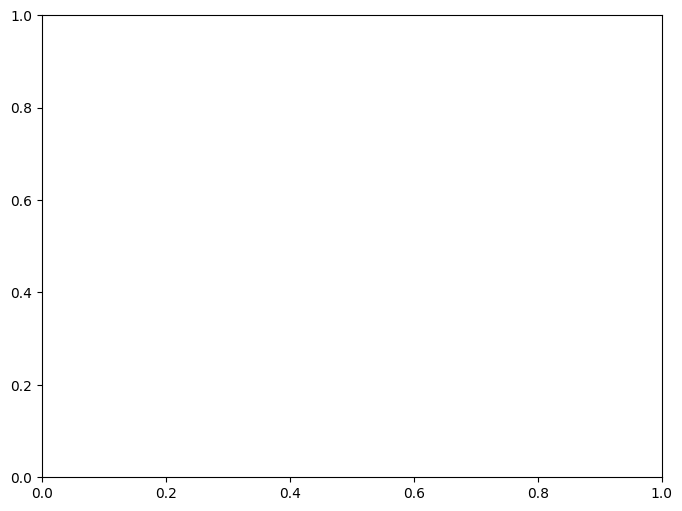

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Supposons que 'lambdas' est un array contenant les valeurs de lambda utilisées dans le modèle,
# et 'vauc' est un array des AUC correspondantes.
# 'best_lambda' et 'best_auc' ont été calculés précédemment, par exemple :
# best_lambda = lambdas[np.argmax(vauc)]
# best_auc = vauc[np.argmax(vauc)]

# Calculer le logarithme de lambda pour l'axe des abscisses
log_lambdas = np.log(lambdas)

plt.figure(figsize=(8, 6))

# Tracer les points : pch=16 (cercle plein), cex=0.5 (taille réduite), lty=2 (ligne en pointillés n'est pas directement applicable pour des points)
plt.scatter(log_lambdas, vauc, color='blue', s=20)  # s définit la taille des points

# Ajouter une ligne verticale en log(best_lambda)
plt.axvline(x=np.log(best_lambda), color='black', linestyle='--')

# Ajouter une ligne horizontale en best_auc
plt.axhline(y=best_auc, color='black', linestyle=':')

plt.xlabel("log(lambda)")
plt.ylabel("AUC")
plt.title("AUC vs log(lambda)")
plt.show()


In [119]:
import numpy as np
from sklearn.metrics import roc_curve

# Supposons que ytpred contient les prédictions (probabilités) pour la classe positive
y_pred_best = ytpred
# correspondant à la meilleure valeur de lambda (c'est-à-dire ytpred[,which.max(vauc)] en R)
# et que y_test (ou yt) contient les vraies étiquettes.

fpr, tpr, thresholds = roc_curve(y_test, y_pred_best, pos_label=1)
max_diff = np.max(tpr - fpr)
print("Max(TPR - FPR):", max_diff)


Max(TPR - FPR): 0.5543478260869565
